In [26]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# sns.set_style("ticks")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_style("whitegrid")
sns.set_style("darkgrid")

sns.set_palette('bright')

In [27]:
p0 = Path('model_checkpoints') / 'mha_pool_balanced_val_2021-04-30' / 'summary.csv'
p1 = Path('model_checkpoints') / 'mha_pool_imbalanced_val_2021-05-01' / 'summary.csv'

In [28]:
df0 = pd.read_csv(p0)
df1 = pd.read_csv(p1)

In [29]:
df0.head()

,epoch,train_loss,train_acc,train_average_valid_weight_sum,train_average_weight_per_valid_class,train_average_weight_per_invalid_class,val_loss,val_acc,val_average_valid_weight_sum,val_average_weight_per_valid_class,val_average_weight_per_invalid_class,time_elapsed
0,0,1.932224,0.392192,0.832060,0.084038,0.007091,1.317855,0.542066,0.983973,0.099831,0.000663,01:06:19
1,1,1.229906,0.568541,0.992117,0.100920,0.000328,1.189308,0.578356,0.993462,0.100911,0.000273,01:08:21
2,2,1.139476,0.595792,0.994662,0.101203,0.000223,1.120268,0.600655,0.996810,0.101270,0.000133,01:05:14
3,3,1.088838,0.611396,0.995677,0.101314,0.000181,1.083478,0.611872,0.996360,0.101221,0.000152,01:05:04
4,4,1.052727,0.622851,0.996280,0.101380,0.000156,1.057816,0.621912,0.993243,0.100893,0.000283,01:05:20


# Training is Deterministic!
Training results are deterministic if you use the same dataset due to how we have coded the training code (we control random seed to be consistent for each training).

In [50]:
df0.head(5) == df1.head(5)

,epoch,train_loss,train_acc,train_average_valid_weight_sum,train_average_weight_per_valid_class,train_average_weight_per_invalid_class,val_loss,val_acc,val_average_valid_weight_sum,val_average_weight_per_valid_class,val_average_weight_per_invalid_class,time_elapsed
0,True,True,True,True,True,True,False,False,False,False,False,False
1,True,True,True,True,True,True,False,False,False,False,False,False
2,True,True,True,True,True,True,False,False,False,False,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False
4,True,True,True,True,True,True,False,False,False,False,False,False


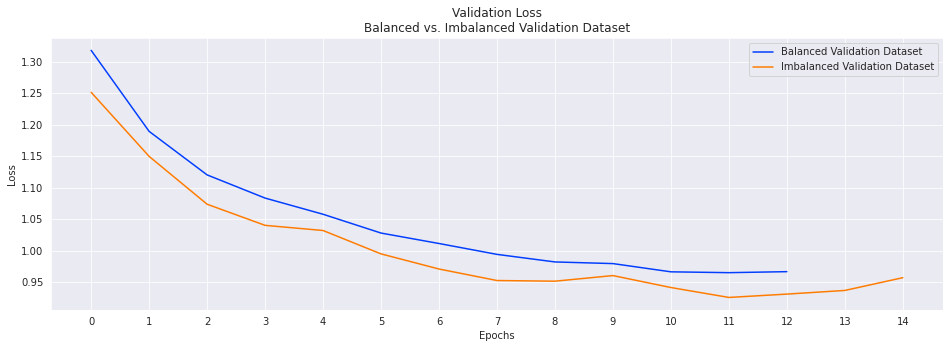

In [48]:
figure = plt.figure(figsize=(16, 5))

plt.plot(df0['epoch'], df0['val_loss'], label='Balanced Validation Dataset')
plt.plot(df1['epoch'], df1['val_loss'], label='Imbalanced Validation Dataset')

plt.title('Validation Loss\nBalanced vs. Imbalanced Validation Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.xticks(df1['epoch'])

plt.show()

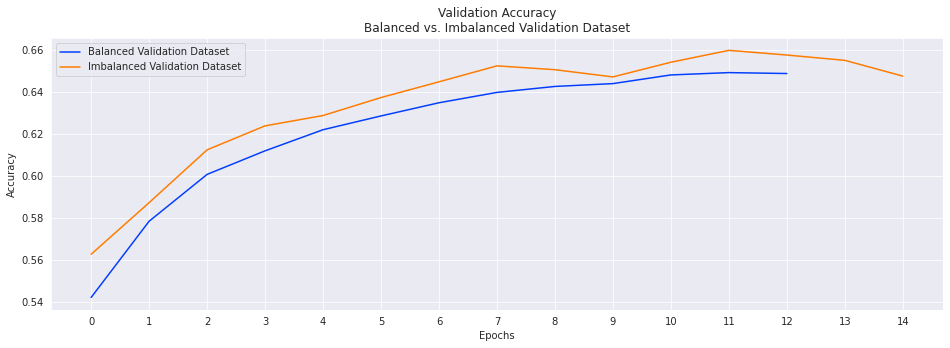

In [49]:
figure = plt.figure(figsize=(16, 5))

plt.plot(df0['epoch'], df0['val_acc'], label='Balanced Validation Dataset')
plt.plot(df1['epoch'], df1['val_acc'], label='Imbalanced Validation Dataset')

plt.title('Validation Accuracy\nBalanced vs. Imbalanced Validation Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.xticks(df1['epoch'])

plt.show()